In [35]:
import pandas as pd
import numpy as py
from sqlalchemy import create_engine
import pymongo
import json
from pprint import pprint
import matplotlib.pyplot as plt

In [36]:
#import pymysql
#pymysql.install_as_MySQLdb()


In [37]:
airline_data_load = "Resources/jan_2019_to_mar_2020_airline_delay_causes.csv"
airline_stats=pd.read_csv(airline_data_load)

In [38]:
airline_stats.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,...,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0,NaN
1,2019,1,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,1.01,...,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0,NaN
2,2019,1,MQ,Envoy Air,SGF,"Springfield, MO: Springfield-Branson National",428.0,80.0,13.31,5.18,...,34.09,15.0,0.0,3954.0,705.0,213.0,982.0,0.0,2054.0,NaN
3,2019,1,MQ,Envoy Air,SHV,"Shreveport, LA: Shreveport Regional",174.0,28.0,5.97,1.17,...,9.72,0.0,0.0,1655.0,360.0,55.0,268.0,0.0,972.0,NaN
4,2019,1,MQ,Envoy Air,SJT,"San Angelo, TX: San Angelo Regional/Mathis Field",135.0,23.0,10.78,0.35,...,5.33,2.0,0.0,835.0,320.0,27.0,192.0,0.0,296.0,NaN


In [39]:
#Total number of arriving flights in the observation

In [40]:
airline_data=airline_stats.groupby(["carrier_name"])
airline_data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,...,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0,NaN
1,2019,1,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,1.01,...,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0,NaN
2,2019,1,MQ,Envoy Air,SGF,"Springfield, MO: Springfield-Branson National",428.0,80.0,13.31,5.18,...,34.09,15.0,0.0,3954.0,705.0,213.0,982.0,0.0,2054.0,NaN
3,2019,1,MQ,Envoy Air,SHV,"Shreveport, LA: Shreveport Regional",174.0,28.0,5.97,1.17,...,9.72,0.0,0.0,1655.0,360.0,55.0,268.0,0.0,972.0,NaN
4,2019,1,MQ,Envoy Air,SJT,"San Angelo, TX: San Angelo Regional/Mathis Field",135.0,23.0,10.78,0.35,...,5.33,2.0,0.0,835.0,320.0,27.0,192.0,0.0,296.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4681,2019,4,EV,ExpressJet Airlines LLC,ABQ,"Albuquerque, NM: Albuquerque International Sun...",8.0,1.0,0.00,0.00,...,0.00,3.0,0.0,16.0,0.0,0.0,16.0,0.0,0.0,NaN
4682,2019,4,EV,ExpressJet Airlines LLC,AEX,"Alexandria, LA: Alexandria International",85.0,18.0,7.34,0.89,...,3.44,4.0,1.0,842.0,363.0,155.0,182.0,0.0,142.0,NaN
4683,2019,4,EV,ExpressJet Airlines LLC,ALB,"Albany, NY: Albany International",28.0,8.0,2.00,0.00,...,5.58,3.0,0.0,486.0,93.0,0.0,15.0,0.0,378.0,NaN
4684,2019,4,EV,ExpressJet Airlines LLC,AMA,"Amarillo, TX: Rick Husband Amarillo International",85.0,20.0,6.85,0.00,...,7.24,4.0,0.0,1394.0,550.0,0.0,252.0,0.0,592.0,NaN


In [41]:
flight_arrivals=airline_data["arr_flights"].sum()

flight_arrivals

carrier_name
Alaska Airlines Inc.         326821.0
Allegiant Air                133547.0
American Airlines Inc.      1175784.0
Delta Air Lines Inc.        1233790.0
Endeavor Air Inc.            327819.0
Envoy Air                    404441.0
ExpressJet Airlines Inc.      37584.0
ExpressJet Airlines LLC      131479.0
Frontier Airlines Inc.       172324.0
Hawaiian Airlines Inc.       104208.0
JetBlue Airways              371304.0
Mesa Airlines Inc.           280676.0
PSA Airlines Inc.            361730.0
Republic Airline             415800.0
SkyWest Airlines Inc.       1048814.0
Southwest Airlines Co.      1691986.0
Spirit Air Lines             259415.0
United Air Lines Inc.        774358.0
Name: arr_flights, dtype: float64

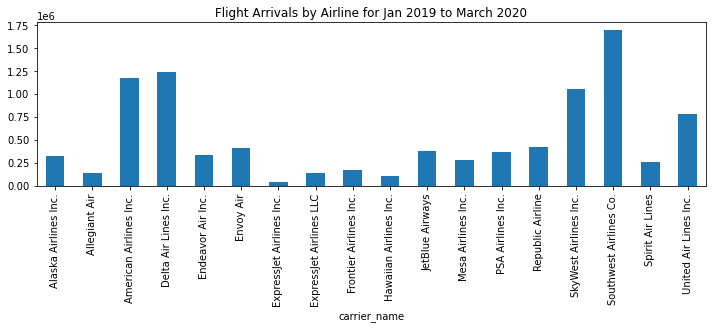

<Figure size 432x288 with 0 Axes>

In [42]:
# Use DataFrame.plot() in order to create a bar chart of the data
flight_arrivals.plot(kind="bar", figsize=(12,3))

# Set a title for the chart
plt.title("Flight Arrivals by Airline for Jan 2019 to March 2020")

plt.show()
plt.tight_layout()

In [43]:
flight_cancelled=airline_data["arr_cancelled"].sum()

flight_cancelled

carrier_name
Alaska Airlines Inc.         6476.0
Allegiant Air                3632.0
American Airlines Inc.      36843.0
Delta Air Lines Inc.        21558.0
Endeavor Air Inc.            7852.0
Envoy Air                   16365.0
ExpressJet Airlines Inc.     1923.0
ExpressJet Airlines LLC      6480.0
Frontier Airlines Inc.       5299.0
Hawaiian Airlines Inc.        804.0
JetBlue Airways              8229.0
Mesa Airlines Inc.          10104.0
PSA Airlines Inc.           11724.0
Republic Airline            12326.0
SkyWest Airlines Inc.       27681.0
Southwest Airlines Co.      56523.0
Spirit Air Lines             5226.0
United Air Lines Inc.       18130.0
Name: arr_cancelled, dtype: float64

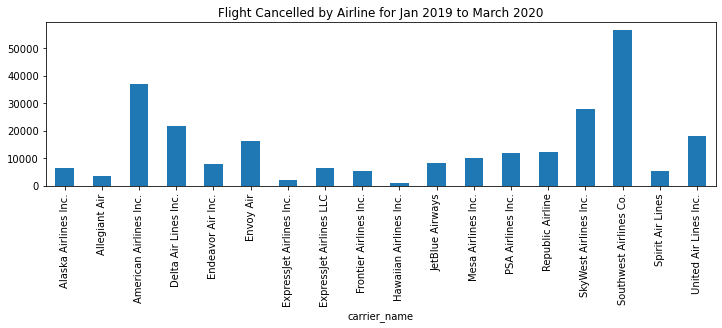

<Figure size 432x288 with 0 Axes>

In [44]:
# Use DataFrame.plot() in order to create a bar chart of the data
flight_cancelled.plot(kind="bar", figsize=(12,3))

# Set a title for the chart
plt.title("Flight Cancelled by Airline for Jan 2019 to March 2020")

plt.show()
plt.tight_layout()

In [45]:
flight_delays=airline_data["arr_del15"].sum()
flight_delays

carrier_name
Alaska Airlines Inc.         58155.0
Allegiant Air                26674.0
American Airlines Inc.      225552.0
Delta Air Lines Inc.        166665.0
Endeavor Air Inc.            51779.0
Envoy Air                    77733.0
ExpressJet Airlines Inc.      8682.0
ExpressJet Airlines LLC      28540.0
Frontier Airlines Inc.       39157.0
Hawaiian Airlines Inc.       11399.0
JetBlue Airways              84192.0
Mesa Airlines Inc.           54734.0
PSA Airlines Inc.            70385.0
Republic Airline             71615.0
SkyWest Airlines Inc.       180397.0
Southwest Airlines Co.      259757.0
Spirit Air Lines             45383.0
United Air Lines Inc.       149075.0
Name: arr_del15, dtype: float64

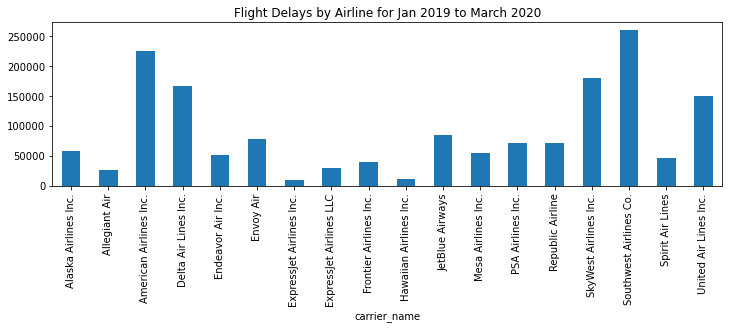

<Figure size 432x288 with 0 Axes>

In [46]:
# Use DataFrame.plot() in order to create a bar chart of the data
flight_delays.plot(kind="bar", figsize=(12,3))

# Set a title for the chart
plt.title("Flight Delays by Airline for Jan 2019 to March 2020")

plt.show()
plt.tight_layout()

In [47]:
flight_diverted=airline_data["arr_diverted"].sum()
flight_diverted

carrier_name
Alaska Airlines Inc.         855.0
Allegiant Air                301.0
American Airlines Inc.      2697.0
Delta Air Lines Inc.        2402.0
Endeavor Air Inc.            629.0
Envoy Air                   1076.0
ExpressJet Airlines Inc.     114.0
ExpressJet Airlines LLC      385.0
Frontier Airlines Inc.       223.0
Hawaiian Airlines Inc.        92.0
JetBlue Airways             1077.0
Mesa Airlines Inc.           729.0
PSA Airlines Inc.           1009.0
Republic Airline             987.0
SkyWest Airlines Inc.       3726.0
Southwest Airlines Co.      3120.0
Spirit Air Lines             435.0
United Air Lines Inc.       2027.0
Name: arr_diverted, dtype: float64

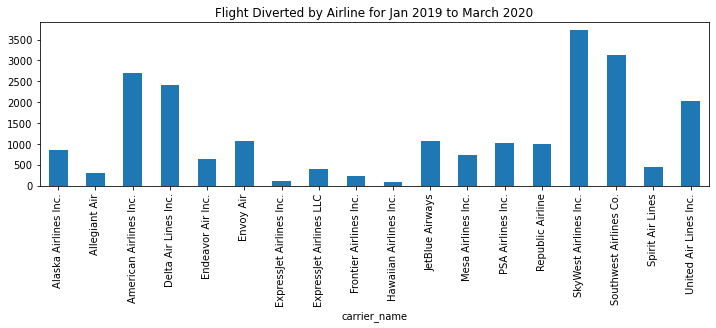

<Figure size 432x288 with 0 Axes>

In [48]:
# Use DataFrame.plot() in order to create a bar chart of the data
flight_diverted.plot(kind="bar", figsize=(12,3))

# Set a title for the chart
plt.title("Flight Diverted by Airline for Jan 2019 to March 2020")

plt.show()
plt.tight_layout()

In [49]:
percentage_flight_arrival=flight_arrivals/flight_cancelled
percentage_flight_arrival

carrier_name
Alaska Airlines Inc.         50.466492
Allegiant Air                36.769548
American Airlines Inc.       31.913362
Delta Air Lines Inc.         57.231190
Endeavor Air Inc.            41.749745
Envoy Air                    24.713779
ExpressJet Airlines Inc.     19.544462
ExpressJet Airlines LLC      20.289969
Frontier Airlines Inc.       32.520098
Hawaiian Airlines Inc.      129.611940
JetBlue Airways              45.121400
Mesa Airlines Inc.           27.778702
PSA Airlines Inc.            30.853804
Republic Airline             33.733571
SkyWest Airlines Inc.        37.889310
Southwest Airlines Co.       29.934469
Spirit Air Lines             49.639303
United Air Lines Inc.        42.711418
dtype: float64

In [50]:
percentage_delays=flight_arrivals/flight_delays
percentage_delays

carrier_name
Alaska Airlines Inc.        5.619826
Allegiant Air               5.006636
American Airlines Inc.      5.212918
Delta Air Lines Inc.        7.402814
Endeavor Air Inc.           6.331119
Envoy Air                   5.202951
ExpressJet Airlines Inc.    4.328956
ExpressJet Airlines LLC     4.606833
Frontier Airlines Inc.      4.400848
Hawaiian Airlines Inc.      9.141855
JetBlue Airways             4.410205
Mesa Airlines Inc.          5.128001
PSA Airlines Inc.           5.139305
Republic Airline            5.806046
SkyWest Airlines Inc.       5.813922
Southwest Airlines Co.      6.513726
Spirit Air Lines            5.716127
United Air Lines Inc.       5.194419
dtype: float64

In [51]:
carrier_dict = {
            "Total Flight Arrivals":flight_arrivals,
            "Total Flight Cancellations": flight_cancelled,
            "Total Flight Delays": flight_delays,
            "Total Flight Diverted": flight_diverted,
            "% of Flight Arrivals": percentage_flight_arrival,
            "% of Flight Delays": percentage_delays
}

In [52]:
carrier_summary= pd.DataFrame(carrier_dict)
carrier_summary

,Total Flight Arrivals,Total Flight Cancellations,Total Flight Delays,Total Flight Diverted,% of Flight Arrivals,% of Flight Delays
carrier_name,,,,,,
Alaska Airlines Inc.,326821.0,6476.0,58155.0,855.0,50.466492,5.619826
Allegiant Air,133547.0,3632.0,26674.0,301.0,36.769548,5.006636
American Airlines Inc.,1175784.0,36843.0,225552.0,2697.0,31.913362,5.212918
Delta Air Lines Inc.,1233790.0,21558.0,166665.0,2402.0,57.231190,7.402814
Endeavor Air Inc.,327819.0,7852.0,51779.0,629.0,41.749745,6.331119
Envoy Air,404441.0,16365.0,77733.0,1076.0,24.713779,5.202951
ExpressJet Airlines Inc.,37584.0,1923.0,8682.0,114.0,19.544462,4.328956
ExpressJet Airlines LLC,131479.0,6480.0,28540.0,385.0,20.289969,4.606833
Frontier Airlines Inc.,172324.0,5299.0,39157.0,223.0,32.520098,4.400848


In [53]:
#Convert to JSON
json_data = carrier_summary.to_json(orient='records')
pprint(json_data)

('[{"Total Flight Arrivals":326821.0,"Total Flight '
 'Cancellations":6476.0,"Total Flight Delays":58155.0,"Total Flight '
 'Diverted":855.0,"% of Flight Arrivals":50.4664916615,"% of Flight '
 'Delays":5.6198263262},{"Total Flight Arrivals":133547.0,"Total Flight '
 'Cancellations":3632.0,"Total Flight Delays":26674.0,"Total Flight '
 'Diverted":301.0,"% of Flight Arrivals":36.7695484581,"% of Flight '
 'Delays":5.0066356752},{"Total Flight Arrivals":1175784.0,"Total Flight '
 'Cancellations":36843.0,"Total Flight Delays":225552.0,"Total Flight '
 'Diverted":2697.0,"% of Flight Arrivals":31.9133621041,"% of Flight '
 'Delays":5.2129176421},{"Total Flight Arrivals":1233790.0,"Total Flight '
 'Cancellations":21558.0,"Total Flight Delays":166665.0,"Total Flight '
 'Diverted":2402.0,"% of Flight Arrivals":57.2311902774,"% of Flight '
 'Delays":7.4028140281},{"Total Flight Arrivals":327819.0,"Total Flight '
 'Cancellations":7852.0,"Total Flight Delays":51779.0,"Total Flight '
 'Diverted":6

In [19]:
#conn = 'mongodb://localhost:27017'
#client = pymongo.MongoClient(conn)
#db = client.carrier_summary
#collection = db.new_stats
#data = json.loads(carrier_summary.to_json(orient='records'))
#collection.insert_many(data)
#cursor = list(collection.find({}))
#for document in cursor:
 #   print(document)